In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [2]:
iris = load_iris()
print(iris.DESCR[:760])
# print(iris.data)
print(iris.target_names)
print(iris.feature_names)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83  
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
X = iris.data
y = iris.target


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [5]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)


GaussianNB()

In [6]:
y_pred = gnb.predict(X_test)


In [7]:
print('Predicted Values')
print(y_pred[:5])
print('Actual Values')
print(y_test[:5])


Predicted Values
[0 1 1 0 2]
Actual Values
[0 1 1 0 2]


In [8]:
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 95.0


In [9]:
print('Accuracy : ' , metrics.accuracy_score(y_test, y_pred))
print('Precison : ' , metrics.precision_score(y_test, y_pred, average="weighted"))
print('Recall Score : ' , metrics.recall_score(y_test, y_pred, average="weighted"))
print('F1 Score : ' , metrics.f1_score(y_test, y_pred, average="weighted"))
print('MCC : ' , metrics.matthews_corrcoef(y_test, y_pred))


Accuracy :  0.95
Precison :  0.9507539682539683
Recall Score :  0.95
F1 Score :  0.95
MCC :  0.9253544620517098


In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.95      0.90      0.93        21
           2       0.90      0.95      0.93        20

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



In [11]:
sklearnconf = metrics.confusion_matrix(y_test, y_pred)
print("\nsklearn Confusion Matrix is \n", sklearnconf)



sklearn Confusion Matrix is 
 [[19  0  0]
 [ 0 19  2]
 [ 0  1 19]]


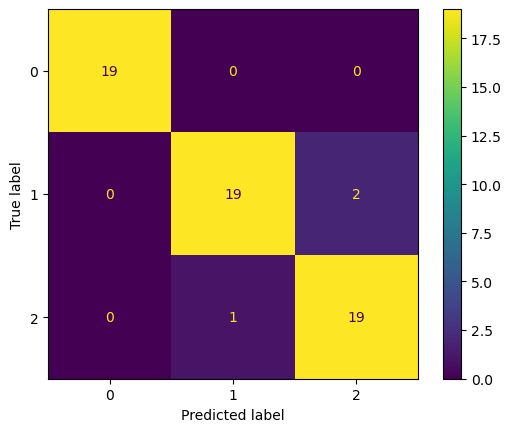

In [12]:
labels = [1,0]
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();
plt.show();

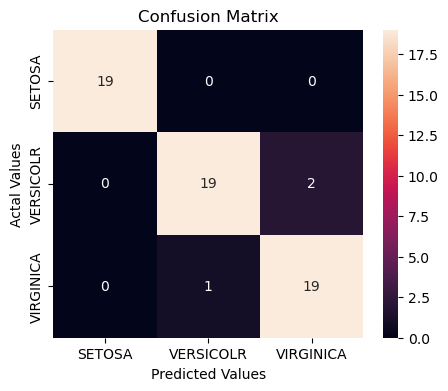

In [13]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
 index = ['SETOSA','VERSICOLR','VIRGINICA'],
 columns = ['SETOSA','VERSICOLR','VIRGINICA'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
